In [1]:
if (!require("pacman")) install.packages("pacman")
library("pacman")

# Installs any missing packages and loads them
pacman::p_load(readr, ggplot2, dplyr, tidyr, glue, readxl, patchwork);

Loading required package: pacman



In [2]:
proj_data_dir <- "/Users/mmir/Library/CloudStorage/Dropbox/git/i58_g3_g4_CF"

In [3]:
fpi <- glue('{proj_data_dir}/med/m3__participant_code_track_map.xlsx')

df <- read_excel(fpi)

In [5]:
df

participant.code,participant.sni_treatment,participant.track,participant.payoff,Introduction.1.player.MTurk_ID,track,track_abbreviation
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
xjulaqnt,Large,Comparison,3.20,NA,Comparison Large,CL
vc2z1rqk,Large,Comparison,3.20,A2XFO0X6RCS98M,Comparison Large,CL
kb6n7gdo,Large,Comparison,3.20,A1A86H96OJ6PI8,Comparison Large,CL
4ehzz2gc,Large,Comparison,3.20,A2EM7RPFW3DU9N,Comparison Large,CL
t6jmltim,Large,Comparison,3.20,A3VFKBRFHGVF0G,Comparison Large,CL
t8iwxgvj,Large,Comparison,3.20,A1LII4M7CS6C9I,Comparison Large,CL
kofj7rpw,Large,Comparison,3.20,A1TXCO12MCTP8P,Comparison Large,CL
aoajk0ce,Large,Comparison,3.20,A5XQ30GQTHHK6,Comparison Large,CL
lj16m7hw,Large,Comparison,3.20,A1X9RXT7MI571,Comparison Large,CL


# Payment Distribution for All Tracks

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


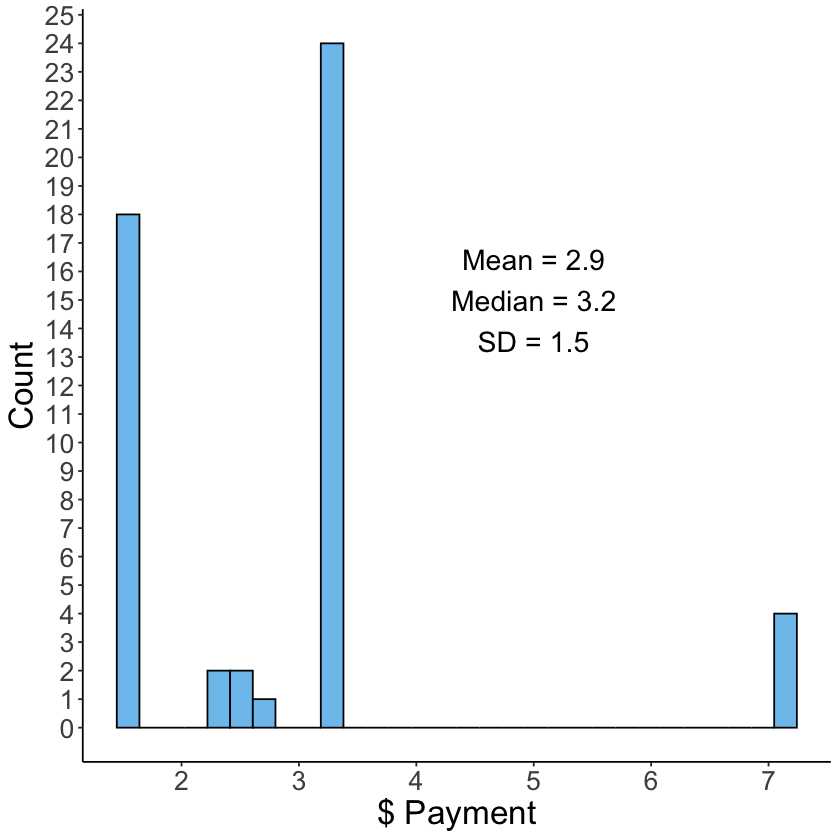

In [30]:
# Calculate summary statistics
mean_val <- mean(df$participant.payoff, na.rm = TRUE)
median_val <- median(df$participant.payoff, na.rm = TRUE)
sd_val <- sd(df$participant.payoff, na.rm = TRUE)

# Create label string
label_text <- sprintf("Mean = %.1f\nMedian = %.1f\nSD = %.1f", mean_val, median_val, sd_val)


all_tracks_hist <- ggplot(data.frame(df), aes(x = participant.payoff)) +
geom_histogram(fill = "#56B4E9", colour = "black", alpha = 0.8) +
labs(x = "$ Payment",
y = "Count") +
scale_x_continuous(breaks=seq(0,10)) +
scale_y_continuous(breaks=seq(0,25,1)) +
theme_bw() +
theme(
text = element_text(size = 20),
panel.border = element_blank(),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
axis.line = element_line(colour = "black")
) +
annotate("text",
x = 5,  # place near center
y = 15,
label = label_text,
size = 6,
color = "black",
hjust = 0.5)

print(all_tracks_hist)

In [34]:
fpo <- glue('{proj_data_dir}/out_fig/f3__total_payments_dist.png')

ggsave(fpo, all_tracks_hist, dpi = 300)

Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


# Payments by Track

In [101]:
# Get unique groups in column c
groups <- unique(df$track_abbreviation)

print(groups)


hist_by_track <- function(group_name, text_x, text_y) {

df_group <- df %>% filter(track_abbreviation == group_name)

# Calculate stats
mean_val <- mean(df_group$participant.payoff, na.rm = TRUE)
median_val <- median(df_group$participant.payoff, na.rm = TRUE)
sd_val <- sd(df_group$participant.payoff, na.rm = TRUE)

label_text <- sprintf("Track = %s\nMean = %.1f\nMedian = %.1f\nSD = %.1f",
group_name, mean_val, median_val, sd_val)

# Create the plot
p <- ggplot(df_group, aes(x = participant.payoff)) +
geom_histogram(fill = "orange", colour = "black", alpha = 0.8) +
labs(x = "$ Payment", y = "Count") +
# scale_x_continuous(breaks=seq(0,10)) +
scale_y_continuous(breaks=seq(0,25,1)) +
theme_bw() +
theme(
text = element_text(size = 14),
panel.border = element_blank(),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
axis.line = element_line(colour = "black")
) +
annotate("text",
x = text_x,
y = text_y,
label = label_text,
size = 3,
color = "black",
hjust = 0.5)

return (p)
}

[1] "CL"  "TL"  "CSU" "TSU" "CSI" "TSI"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


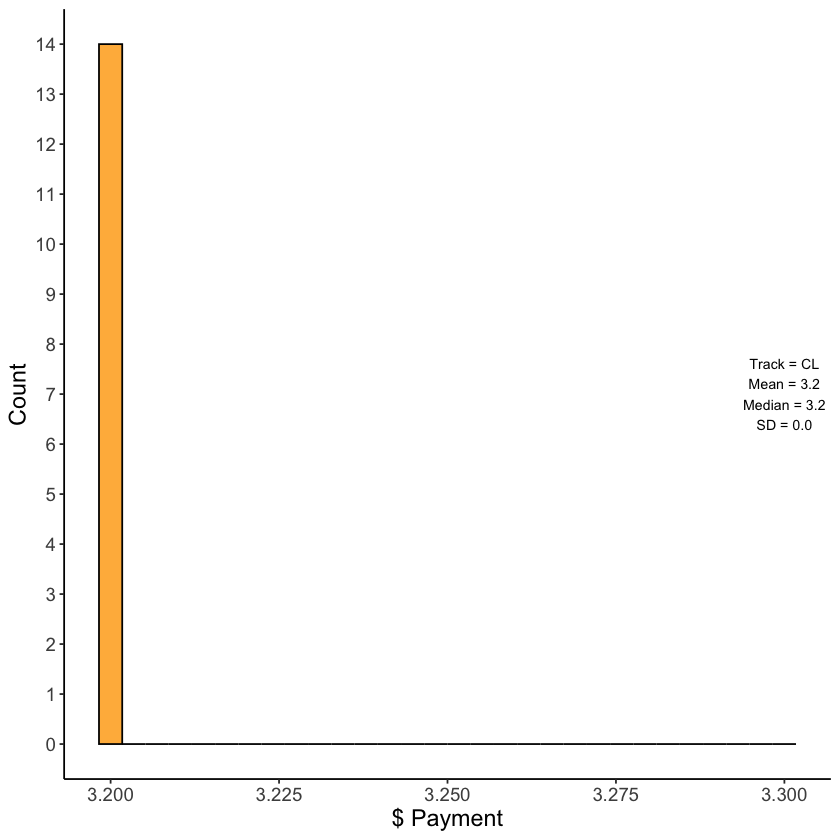

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


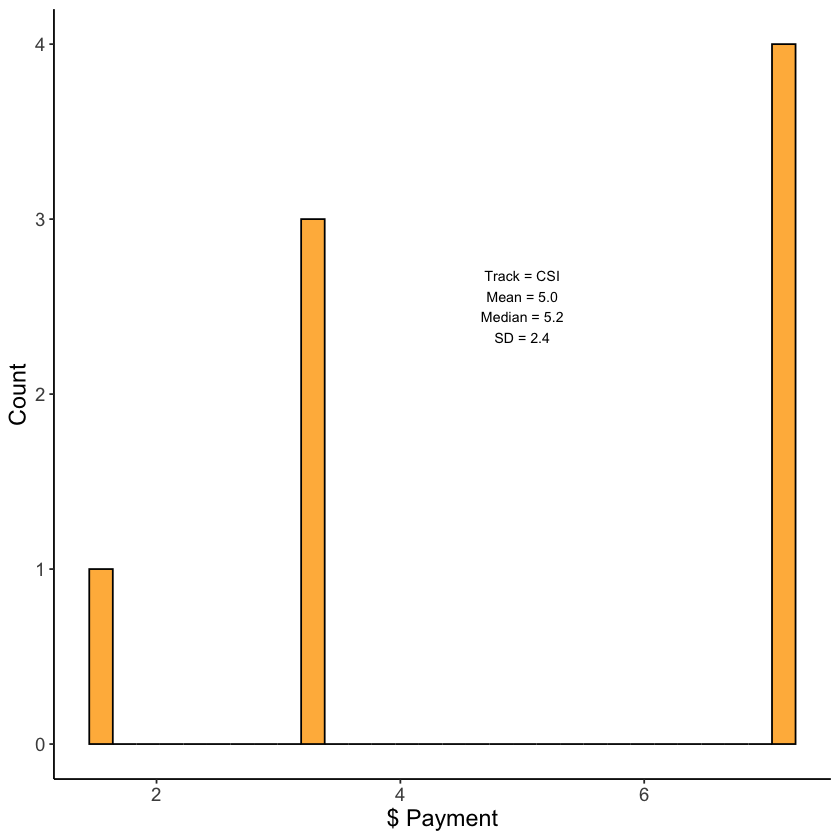

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


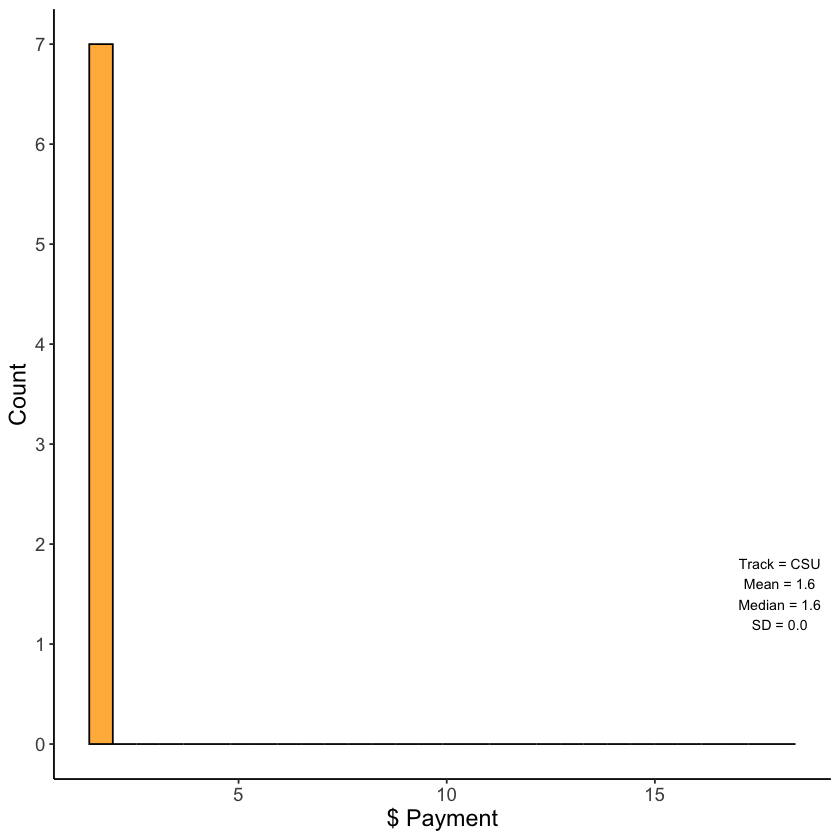

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


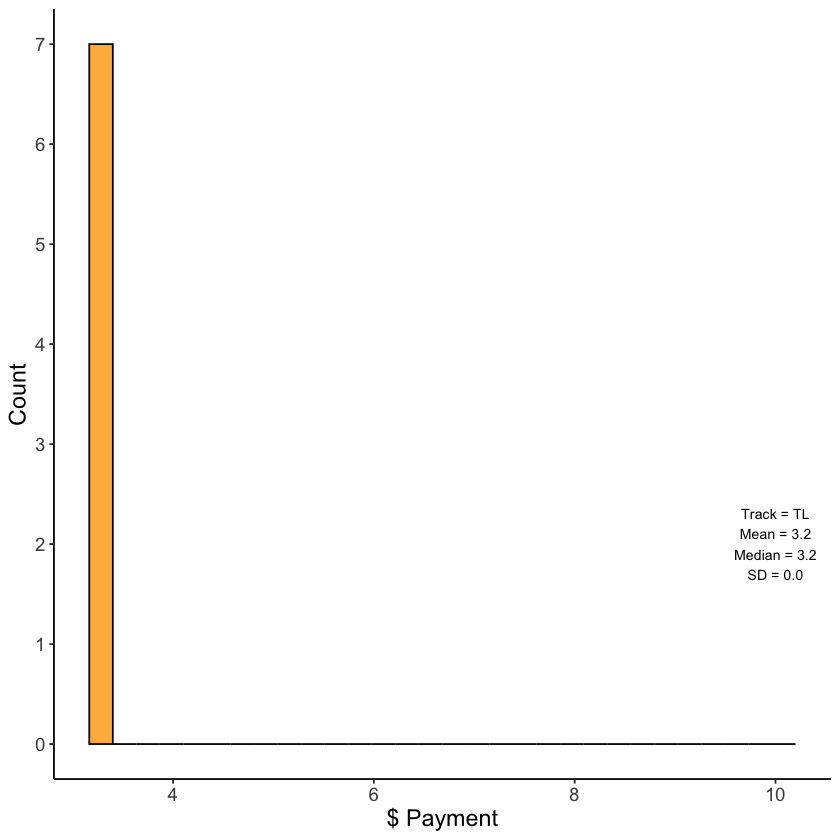

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


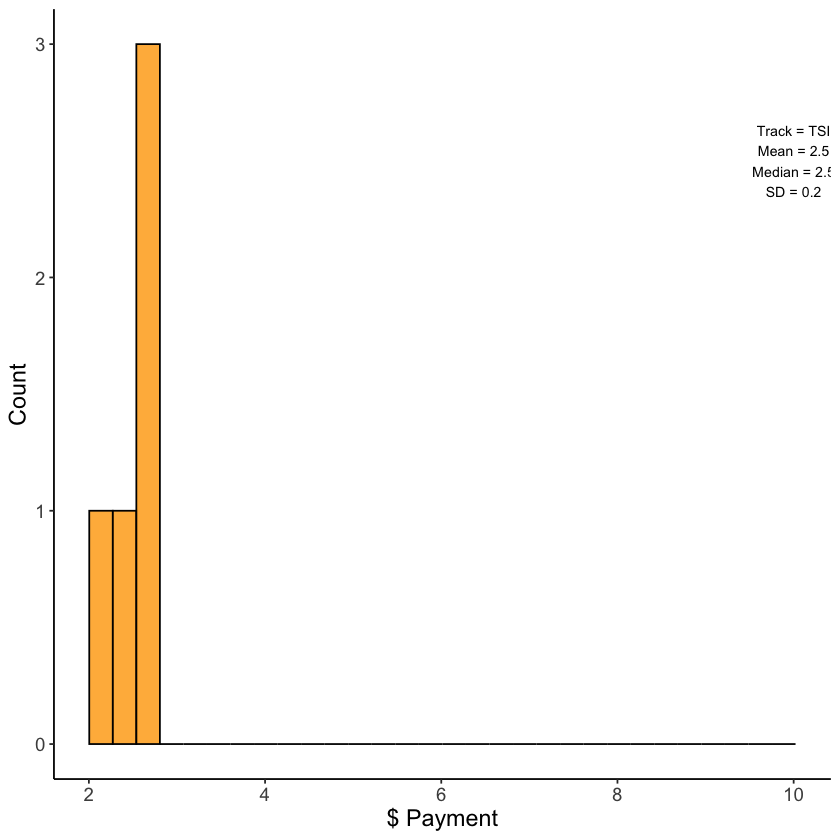

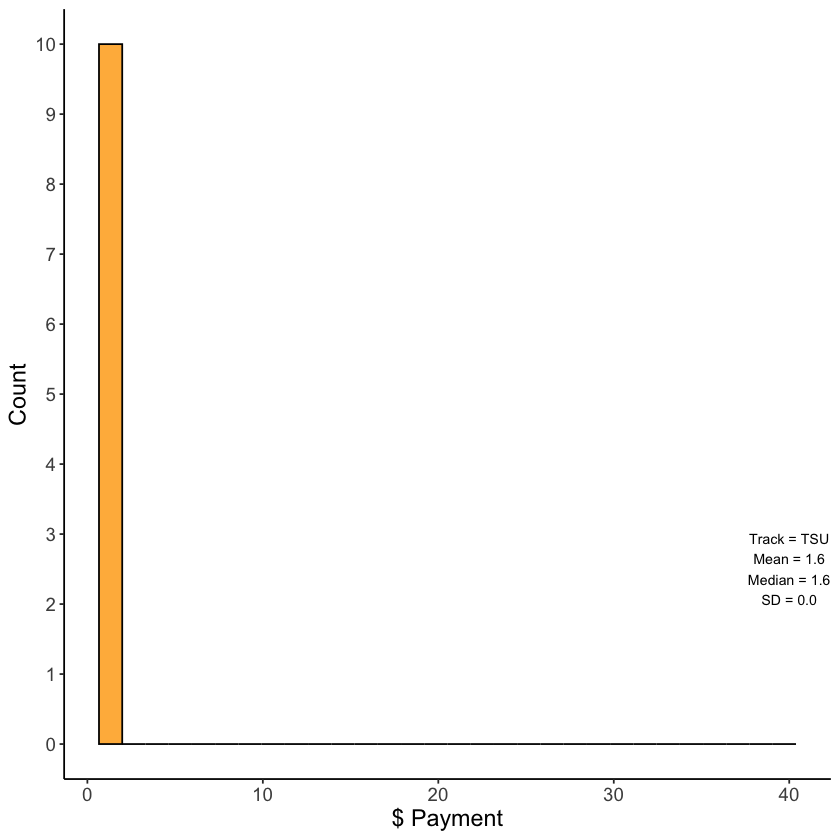

In [102]:
p1 <- hist_by_track("CL" , 3.3 , 7)
p1

p2 <- hist_by_track("CSI" , 5 , 2.5)
p2

p3 <- hist_by_track("CSU" , 18 , 1.5)
p3

p4 <- hist_by_track("TL" , 10 , 2)
p4

p5 <- hist_by_track("TSI" , 10 , 2.5)
p5

p6 <- hist_by_track("TSU" , 40 , 2.5)
p6

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


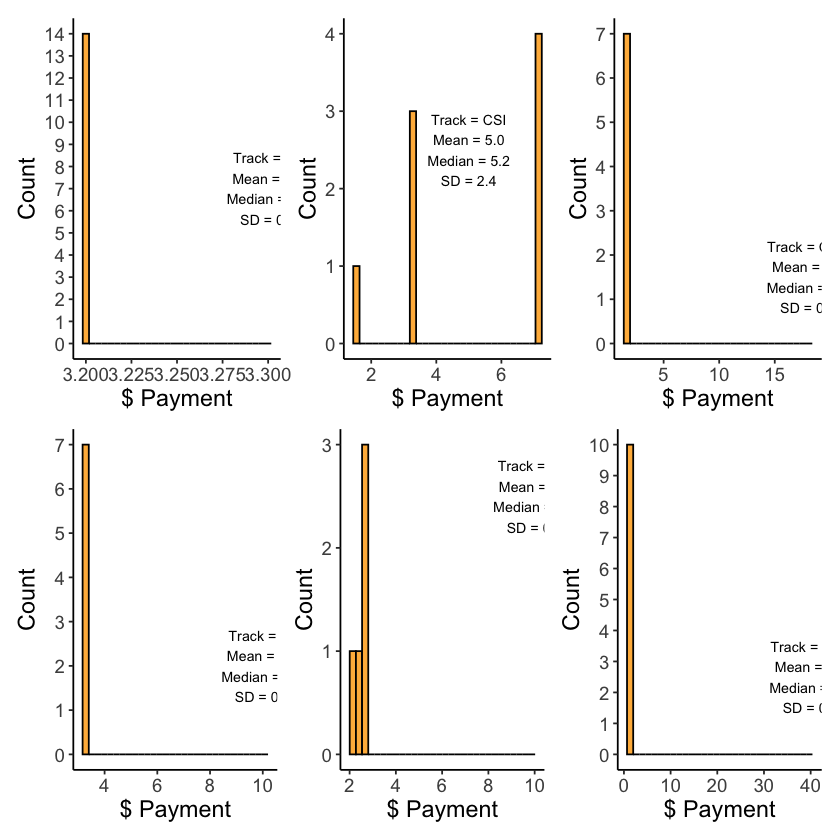

In [103]:
# Combine all 6 plots into a 3x2 grid
final_plot <- (p1 | p2 | p3) / (p4 | p5 | p6)
final_plot

In [104]:
fpo <- glue('{proj_data_dir}/out_fig/f4__payment_by_track.png')
ggsave(fpo , final_plot , dpi = 300)

Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
